Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005198 entries, 0 to 1005197
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005198 non-null  int64  
 1   Date Rptd       1005198 non-null  object 
 2   DATE OCC        1005198 non-null  object 
 3   TIME OCC        1005198 non-null  int64  
 4   AREA            1005198 non-null  int64  
 5   AREA NAME       1005198 non-null  object 
 6   Rpt Dist No     1005198 non-null  int64  
 7   Part 1-2        1005198 non-null  int64  
 8   Crm Cd          1005198 non-null  int64  
 9   Crm Cd Desc     1005198 non-null  object 
 10  Mocodes         853438 non-null   object 
 11  Vict Age        1005198 non-null  int64  
 12  Vict Sex        860416 non-null   object 
 13  Vict Descent    860404 non-null   object 
 14  Premis Cd       1005182 non-null  float64
 15  Premis Desc     1004610 non-null  object 
 16  Weapon Used Cd  3

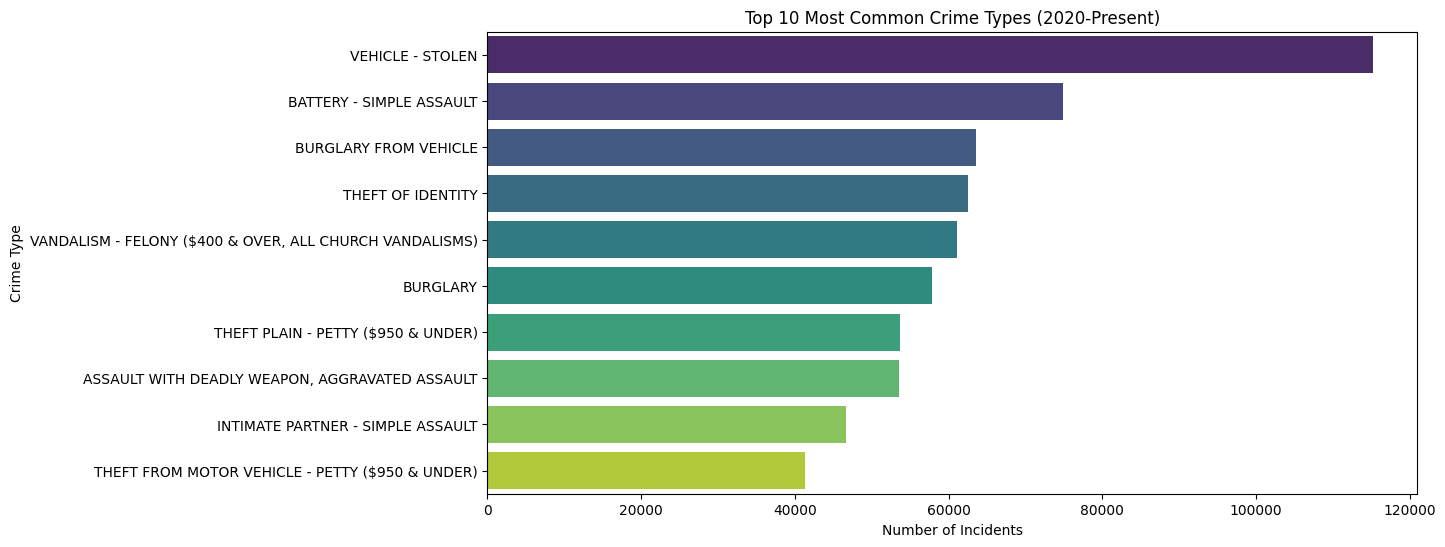

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
url = "https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Data Cleaning
print("Initial Data Info:")
print(df.info())

# Convert date columns to datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
df['Hour'] = pd.to_datetime(df['TIME OCC'].astype(str).str.zfill(4), format='%H%M').dt.hour

# Handle missing values
df['Vict Age'] = df['Vict Age'].fillna(df['Vict Age'].median())
df['Vict Sex'] = df['Vict Sex'].fillna('Unknown')

# Objective 1: Distribution of Crime Types
print("\nObjective 1: Crime Type Distribution")
top_crimes = df['Crm Cd Desc'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='viridis')
plt.title('Top 10 Most Common Crime Types (2020-Present)')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.show()



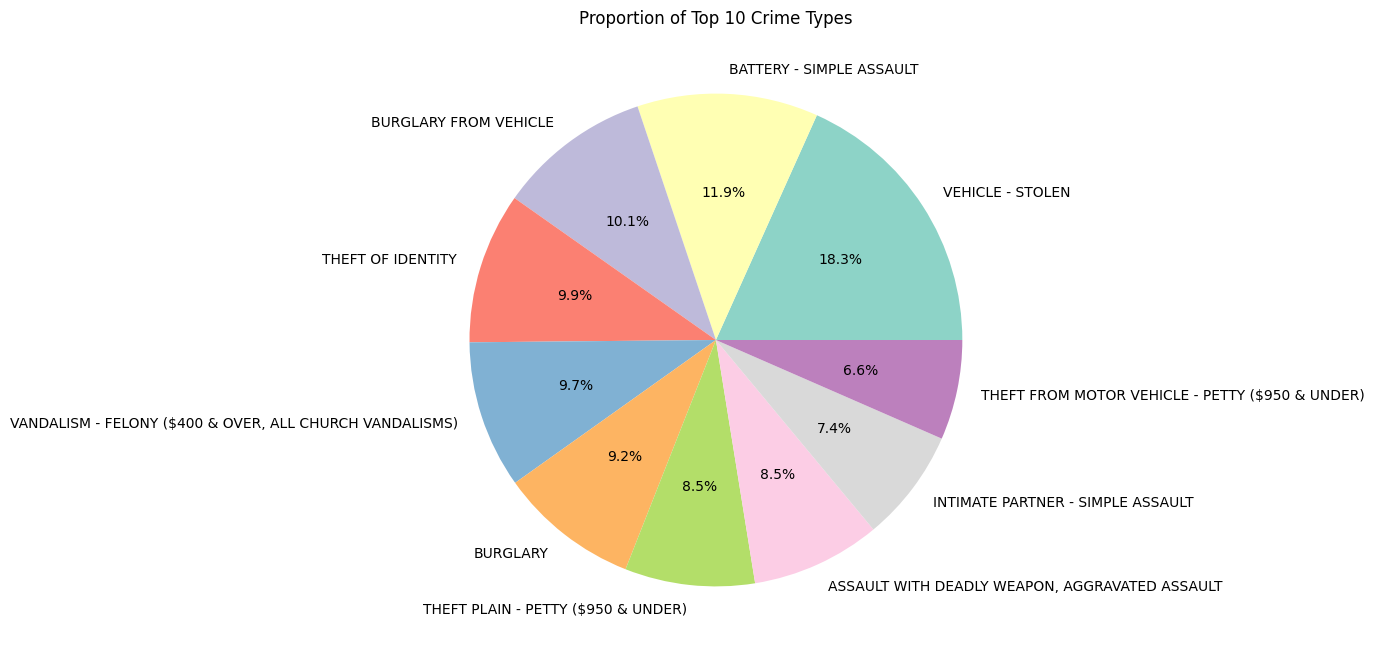

In [ ]:
# Pie Chart for Crime Types
plt.figure(figsize=(10, 8))
top_crimes.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Proportion of Top 10 Crime Types')
plt.ylabel('')
plt.show()


Objective 2: Temporal Analysis


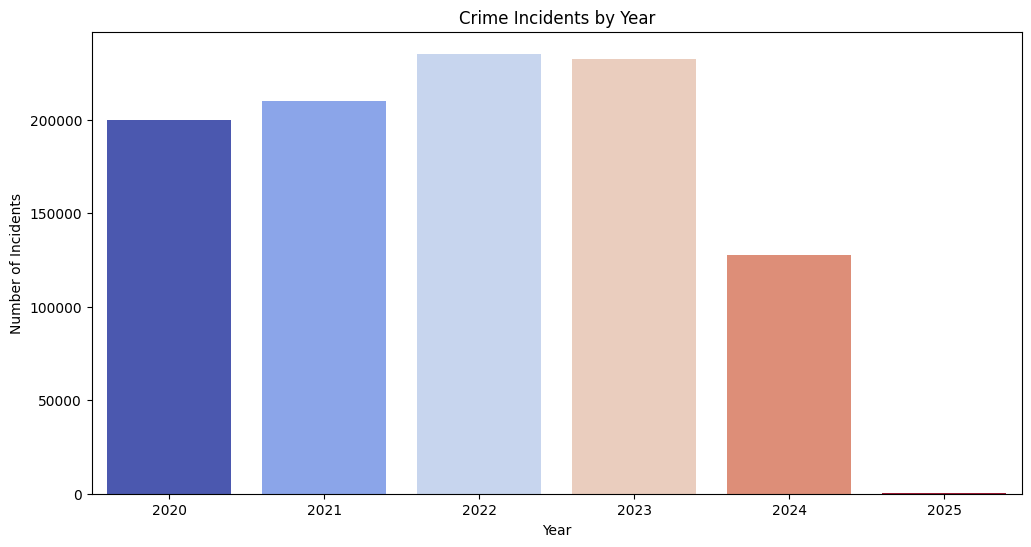

In [ ]:
# Objective 2: Temporal Patterns
print("\nObjective 2: Temporal Analysis")
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year', hue='Year', palette='coolwarm')
plt.title('Crime Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend([],[], frameon=False)
plt.show()

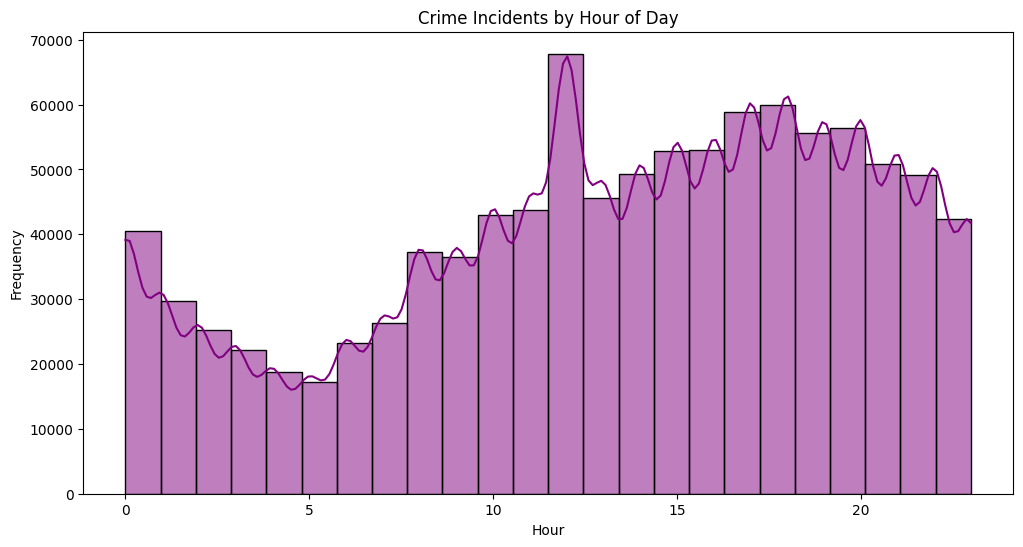

In [ ]:
# Hourly Crime Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Hour'], bins=24, kde=True, color='purple')
plt.title('Crime Incidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()



Objective 3: Crime by Area


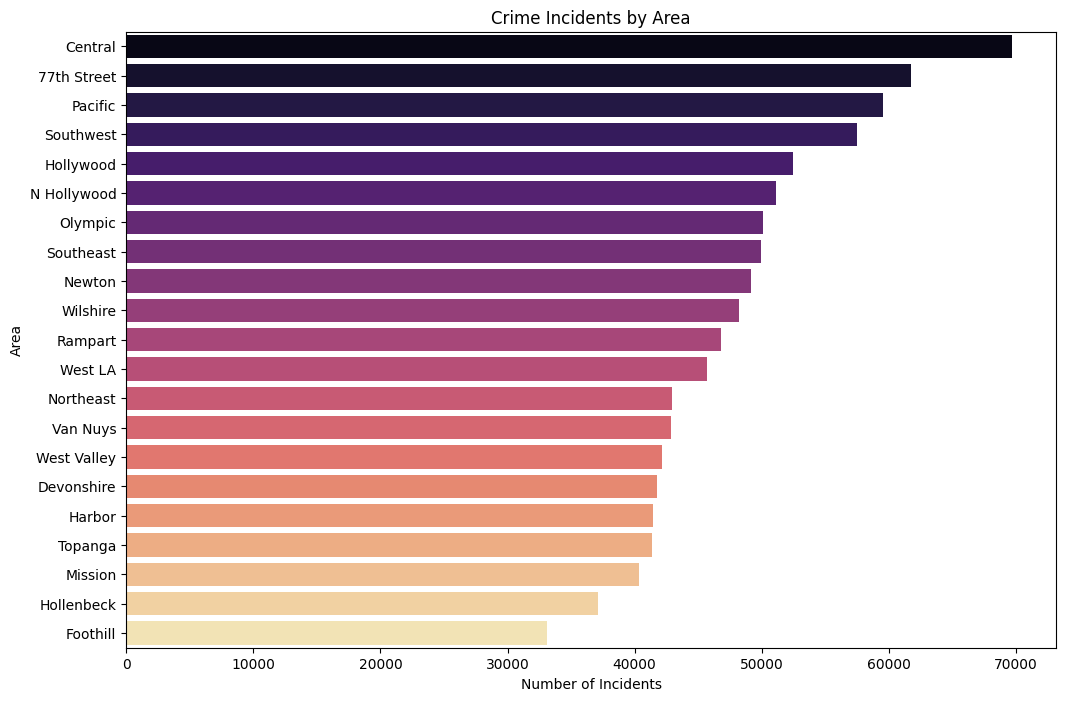

In [ ]:
# Objective 3: Geographical Distribution
print("\nObjective 3: Crime by Area")
area_counts = df['AREA NAME'].value_counts()
plt.figure(figsize=(12, 8))
sns.barplot(y=area_counts.index, x=area_counts.values, palette='magma')
plt.title('Crime Incidents by Area')
plt.xlabel('Number of Incidents')
plt.ylabel('Area')
plt.show()


Objective 4: Covariance and Correlation Analysis
Covariance Matrix:
              Vict Age   Crm Cd Num
Vict Age    483.728254   -45.777672
Crm Cd Num  -45.777672  1131.618370

Correlation Matrix:
            Vict Age  Crm Cd Num
Vict Age    1.000000   -0.061873
Crm Cd Num -0.061873    1.000000


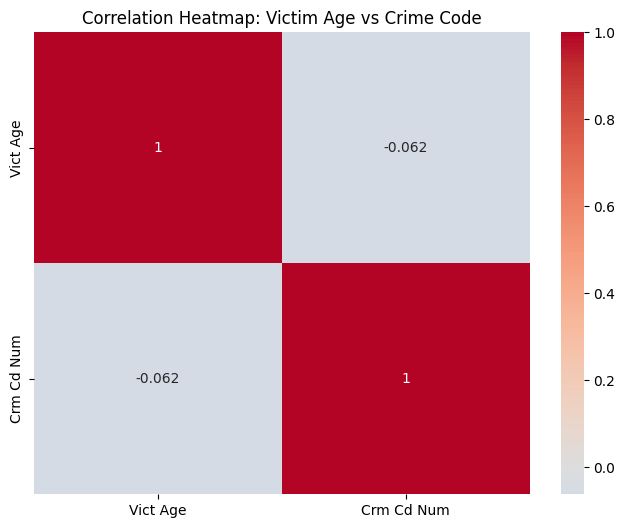

In [ ]:
# Objective 4: Covariance and Correlation (Victim Age and Crime Code)
print("\nObjective 4: Covariance and Correlation Analysis")
# Numeric encoding for correlation
df['Crm Cd Num'] = df['Crm Cd'].astype('category').cat.codes
cov_matrix = df[['Vict Age', 'Crm Cd Num']].cov()
print("Covariance Matrix:")
print(cov_matrix)

corr_matrix = df[['Vict Age', 'Crm Cd Num']].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Heatmap of Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Victim Age vs Crime Code')
plt.show()


Objective 5: Statistical Tests
T-test between Central and Hollywood areas: t-statistic = 0.86, p-value = 0.3917


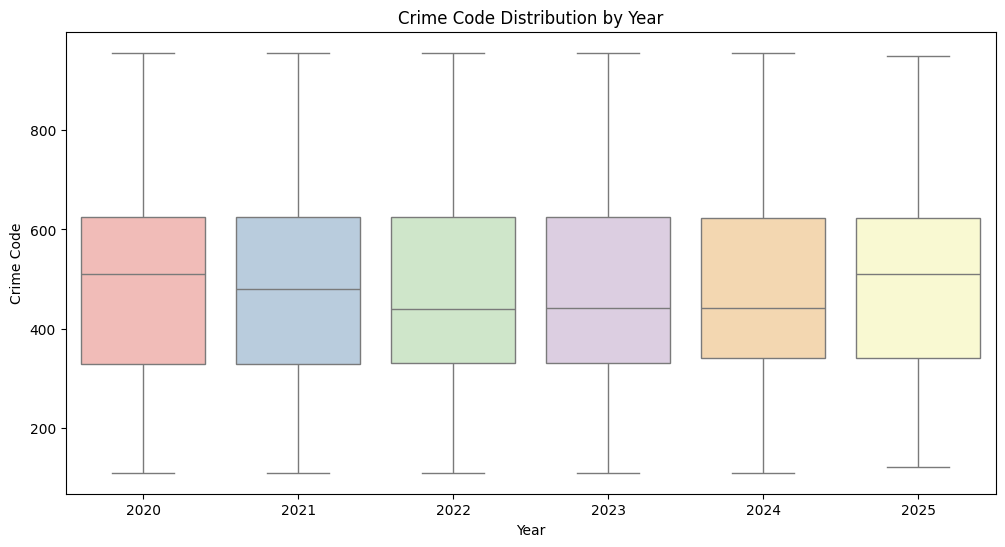

In [ ]:
# Objective 5: Statistical Tests
print("\nObjective 5: Statistical Tests")
# T-test: Compare crime counts between two areas (e.g., Central vs. Hollywood)
central_crimes = df[df['AREA NAME'] == 'Central']['Crm Cd'].count()
hollywood_crimes = df[df['AREA NAME'] == 'Hollywood']['Crm Cd'].count()
t_stat, p_value = stats.ttest_ind(
    df[df['AREA NAME'] == 'Central']['Crm Cd'].value_counts(),
    df[df['AREA NAME'] == 'Hollywood']['Crm Cd'].value_counts(),
    equal_var=False
)
print(f"T-test between Central and Hollywood areas: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

# Additional Statistical View: Crime Code Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Crm Cd', data=df, palette='Pastel1')
plt.title('Crime Code Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Crime Code')
plt.show()

In [ ]:
# Save cleaned dataset for reference
df.to_csv('cleaned_crime_data.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_crime_data.csv'")


Cleaned dataset saved as 'cleaned_crime_data.csv'
